In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix


In [5]:
def count_images(directory):
    for folder in os.listdir(directory):
        path = os.path.join(directory, folder)
        print(folder, ":", len(os.listdir(path)))

train_dir = "./Training"
test_dir = "./Testing"

print("Training Data:")
count_images(train_dir)

print("\nTesting Data:")
count_images(test_dir)


Training Data:
glioma : 1321
meningioma : 1339
notumor : 1595
pituitary : 1457

Testing Data:
glioma : 300
meningioma : 306
notumor : 405
pituitary : 300


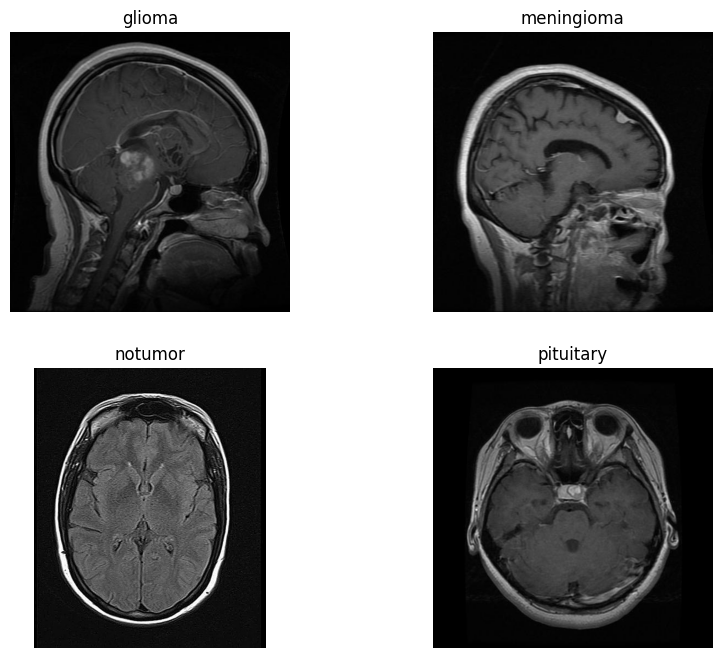

In [6]:
import random
from tensorflow.keras.preprocessing.image import load_img

plt.figure(figsize=(10,8))

for i, category in enumerate(os.listdir(train_dir)):
    img_path = os.path.join(train_dir, category, random.choice(os.listdir(os.path.join(train_dir, category))))
    img = load_img(img_path)
    
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")

plt.show()


In [7]:
img_size = 224
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.5501 - loss: 1.0151 - val_accuracy: 0.6995 - val_loss: 0.8586
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 170s 946ms/step - accuracy: 0.7036 - loss: 0.7465 - val_accuracy: 0.7147 - val_loss: 0.8682
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 171s 957ms/step - accuracy: 0.7528 - loss: 0.6419 - val_accuracy: 0.7567 - val_loss: 0.6451
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.7605 - loss: 0.6204 - val_accuracy: 0.7582 - val_loss: 0.6263
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.7848 - loss: 0.5618 - val_accuracy: 0.7414 - val_loss: 0.7117
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7871 - loss: 0.5470 - val_accuracy: 0.7849 - val_loss: 0.5820
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.8067 - loss: 0.5079 - val_accuracy: 0.7971 - val_loss: 0.5589
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8114 - loss: 0.5057 - va

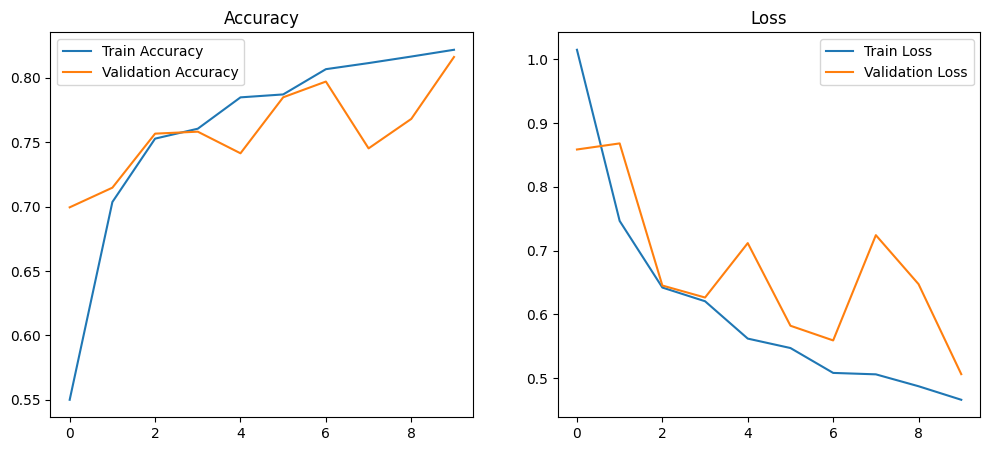

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [11]:
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(test_data.classes, y_pred_classes, target_names=test_data.class_indices.keys()))


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 200ms/step
              precision    recall  f1-score   support

      glioma       0.93      0.67      0.78       300
  meningioma       0.68      0.58      0.62       306
     notumor       0.79      0.99      0.88       405
   pituitary       0.88      0.97      0.93       300

    accuracy                           0.82      1311
   macro avg       0.82      0.80      0.80      1311
weighted avg       0.82      0.82      0.81      1311



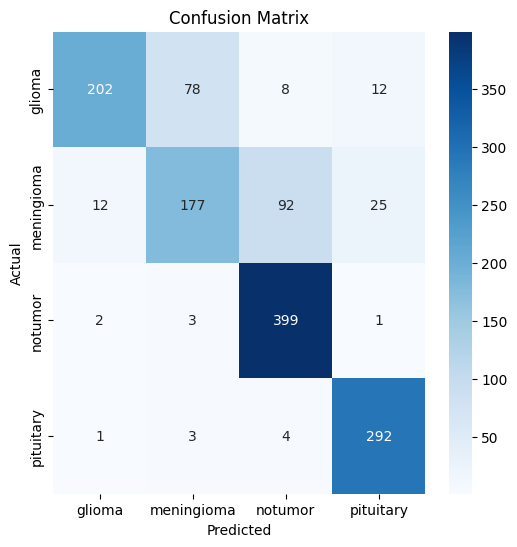

In [12]:
cm = confusion_matrix(test_data.classes, y_pred_classes)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


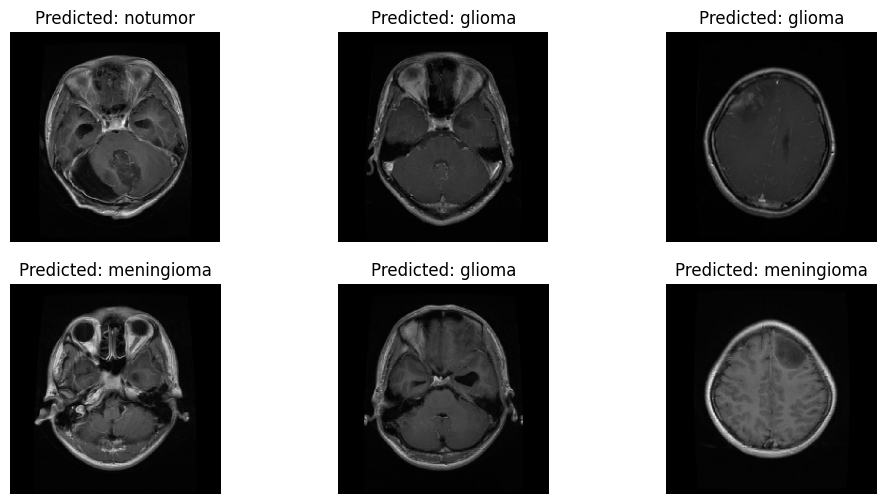

In [13]:
images, labels = next(test_data)
predictions = model.predict(images)

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Predicted: {list(test_data.class_indices.keys())[np.argmax(predictions[i])]}")
    plt.axis("off")
plt.show()
